In [1]:
import numpy as np # General numerical tools
import h5py as h5py # File management
import matplotlib.pyplot as plt # Plotting tools

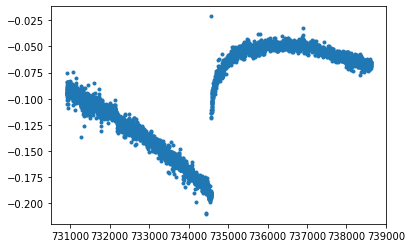

In [5]:
# Read in data 
hdf5_file = h5py.File("./test.hdf5", "r")
datef = np.array(hdf5_file.get("date"))
eastposf = np.array(hdf5_file.get("eastpos"))
northposf = np.array(hdf5_file.get("northpos"))
hdf5_file.close()

# Choose a station
staidx = 1

# Make a plot
fig, ax = plt.subplots() # Set up the axes
ax.plot(datef[staidx, datef[staidx, :] != 0], eastposf[staidx, datef[staidx, :] != 0], '.') # Place time vs. position in those axes for specified station
plt.show()
